# Random Forest Models for Classification

## Objectives

- Demonstrate the construction and functioning of Random Forest models for classification tasks.
- Compare the performance of a Random Forest model with a simple Decision Tree model.
- Evaluate model performance using accuracy, Out-of-Bag (OOB) score, and feature importance metrics.

## Background

Random Forest is an ensemble learning method for classification that operates by constructing a multitude of decision trees at training time and outputting the class, which is the mode of the classes of the individual trees. It is highly effective for large datasets and can handle thousands of input variables without variable deletion.

## Datasets Used

- Synthetic Dataset: Generated using make_blobs.
- Raisin Dataset: Contains measurements of different physical properties of raisins, used to predict varieties of raisins.

## Introduction

A decision tree is a tree-like model used in machine learning and data mining to help make decisions. 

In [1]:
import numpy as np
np.random.seed(50) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set default figure size
sns.set_theme(rc={"figure.figsize":(6, 4)})

In [2]:
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## Understanding Random Forest

Let's start by generating some data.

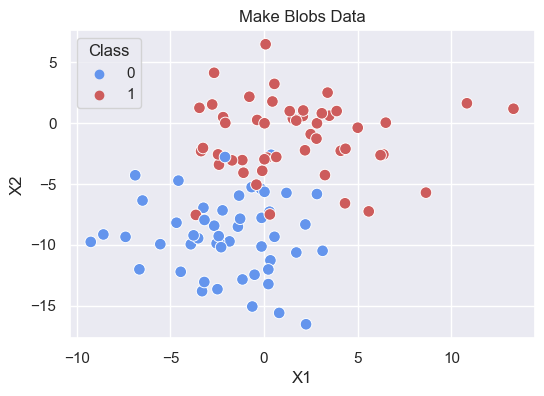

In [3]:
# The data
X, cl = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=3)
dfb = pd.DataFrame()
dfb['X1'] = X[:,0]
dfb['X2'] = X[:,1]
dfb['Class'] = cl
sns.scatterplot(x=dfb.X1, y=dfb.X2, s=70, hue=dfb.Class, 
                palette=['cornflowerblue', 'indianred']).set_title("Make Blobs Data");

In [4]:
X = dfb[['X1','X2']]    # Feature Matrix
y = dfb.Class           # Target variable

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(X_train1), len(X_test1)))

Train = 80 cases 	 Test = 20 cases


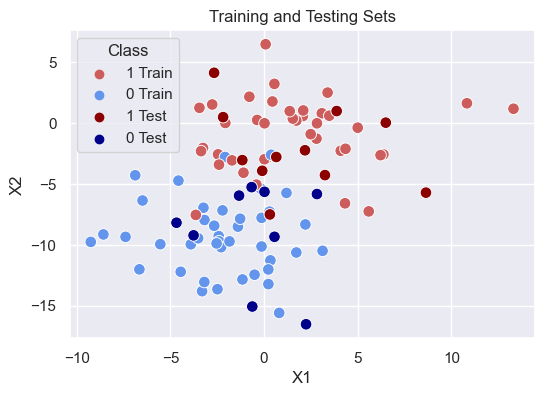

In [6]:
# Graphing the training and test sets
sns.scatterplot(x=X_train1.X1, y=X_train1.X2, s=70, hue=y_train1.replace({0:'0 Train', 1:'1 Train'}), 
                palette=['indianred', 'cornflowerblue'])
sns.scatterplot(x=X_test1.X1,  y=X_test1.X2,  s=70, hue=y_test1.replace({0:'0 Test', 1:'1 Test'}),    
                palette=['darkred', 'darkblue']).set_title("Training and Testing Sets");

In [7]:
# Saving training and testing data
data_train1 = pd.concat([X_train1, y_train1], axis=1)
data_test1  = pd.concat([X_test1, y_test1], axis=1)
data_train1.head()

,X1,X2,Class
85,-2.459759,-2.573120,1
28,1.194007,-5.736837,0
8,-3.239853,-6.954107,0
11,4.999948,-0.385664,1
63,0.080990,6.462332,1


### Decision Tree Model

Let's create a decision tree with a maximum depth of 2 (`max_depth = 2`).

In [8]:
# Initializing a simple model with a maximum depth of 2
dt1 = tree.DecisionTreeClassifier(random_state=0, max_depth=2) 
dt1.fit(X_train1, y_train1)         # Fitting the model

DecisionTreeClassifier(max_depth=2, random_state=0)

In [9]:
print('Tree Model - Training Set Score = %.3f' %dt1.score(X_train1, y_train1))
print('Tree Model - Testing Set  Score = %.3f' %dt1.score(X_test1, y_test1))

Tree Model - Training Set Score = 0.950
Tree Model - Testing Set  Score = 0.900


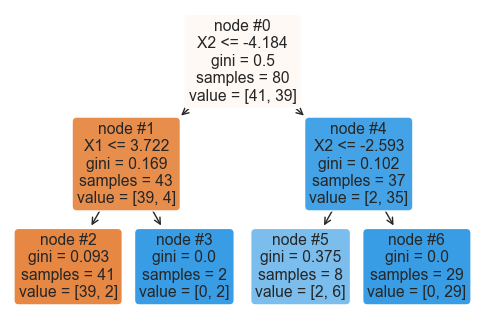

In [10]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(6, 4))
tree.plot_tree( dt1,
                feature_names=X_train1.columns,
                filled=True,
                node_ids=True,
                rounded=True                 
                );

In [11]:
# Prediction 
data_train1['Class_tree'] = dt1.predict(X_train1)
data_test1['Class_tree']  = dt1.predict(X_test1)
data_train1.head()

,X1,X2,Class,Class_tree
85,-2.459759,-2.573120,1,1
28,1.194007,-5.736837,0,0
8,-3.239853,-6.954107,0,0
11,4.999948,-0.385664,1,1
63,0.080990,6.462332,1,1


### Random Forest Model

Let's create a simple random forest model using 20 tree models with a maximum depth of 2 for simplicity.

In [12]:
# Initializing and fitting the model
rf1 = RandomForestClassifier(n_estimators=20,   # Number of trees                            
                            max_depth=2,        # Max depth of each tree 
                            oob_score=True,     # For computing later the OOB score 
                            random_state=0)     # For reproducibility
rf1.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=2, n_estimators=20, oob_score=True,
                       random_state=0)

In [13]:
print('Random Forest Model - Training Set Score = %.3f' %rf1.score(X_train1, y_train1))
print('Random Forest Model - Testing Set  Score = %.3f' %rf1.score(X_test1, y_test1))

Random Forest Model - Training Set Score = 0.950
Random Forest Model - Testing Set  Score = 0.950


In [14]:
# Prediction 
data_train1['Class_rf'] = rf1.predict(X_train1)
data_test1['Class_rf']  = rf1.predict(X_test1)
data_train1.head()

,X1,X2,Class,Class_tree,Class_rf
85,-2.459759,-2.573120,1,1,1
28,1.194007,-5.736837,0,0,0
8,-3.239853,-6.954107,0,0,0
11,4.999948,-0.385664,1,1,1
63,0.080990,6.462332,1,1,1


In [15]:
# Number of tree models used
len(rf1.estimators_)

20

Let's visualize some of the them.

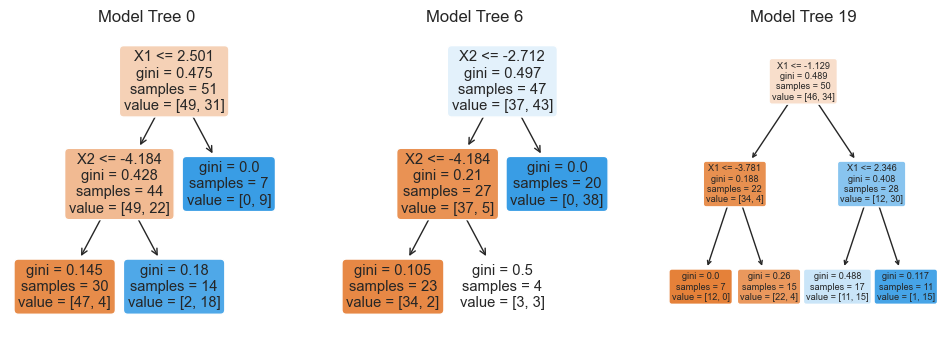

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(131)            # Model Tree 0
tree.plot_tree( rf1.estimators_[0], feature_names=X_train1.columns,
                filled=True, rounded=True)
plt.title('Model Tree 0')

plt.subplot(132)            # Model Tree 6
tree.plot_tree( rf1.estimators_[6], feature_names=X_train1.columns,
                filled=True, rounded=True)
plt.title('Model Tree 6')


plt.subplot(133)            # Model Tree 19
tree.plot_tree( rf1.estimators_[19], feature_names=X_train1.columns,
                filled=True, rounded=True)
plt.title('Model Tree 19');

Notice the sum of the samples of the leaves of those trees is not 100. Remember each tree is built with a subset of the original samples.

`RandomForestClassifier` has a parameter `bootstrap`. If `False`, the whole dataset is used to build each tree.

Each model tree in the random forest has a score.

In [17]:
for k in range(len(rf1.estimators_)):
    print('Tree Model %i \t Score = %.3f' %(k, rf1.estimators_[k].score(X_train1.values, y_train1.values)))

Tree Model 0 	 Score = 0.938
Tree Model 1 	 Score = 0.875
Tree Model 2 	 Score = 0.912
Tree Model 3 	 Score = 0.912
Tree Model 4 	 Score = 0.925
Tree Model 5 	 Score = 0.925
Tree Model 6 	 Score = 0.875
Tree Model 7 	 Score = 0.762
Tree Model 8 	 Score = 0.912
Tree Model 9 	 Score = 0.750
Tree Model 10 	 Score = 0.688
Tree Model 11 	 Score = 0.950
Tree Model 12 	 Score = 0.925
Tree Model 13 	 Score = 0.700
Tree Model 14 	 Score = 0.800
Tree Model 15 	 Score = 0.950
Tree Model 16 	 Score = 0.912
Tree Model 17 	 Score = 0.912
Tree Model 18 	 Score = 0.912
Tree Model 19 	 Score = 0.713


Note that those scores are not high. The score of the random forest model is higher than all of them. 

The score of a random forest model can be obtained by aggregating the scores of its tree models. The most common way to do this is by using the "majority voting" rule, where the predicted class is the one that receives the most votes from the individual trees.

###  Out-of-bag score

Since random forest models involve building trees from random subsets or "bags" of data, model performance can be estimated by making predictions on the out-of-bag (OOB) samples.

The OOB samples can be used to estimate the performance of the model by calculating the prediction accuracy on the OOB samples using the predictions of only the trees that did not use that sample for training.

In [18]:
# Getting the oob_score
print("Out of bag score = %.4f" %(rf1.oob_score))

Out of bag score = 1.0000


### Features importance

The random forest model assigns an importance value to each feature used in training. Features with higher importance were more influential in creating the model, indicating a stronger association with the target variable.

In [19]:
ft_importance = pd.DataFrame()
ft_importance['feature']    = X_train1.columns
ft_importance['importance'] = rf1.feature_importances_ 
ft_importance

,feature,importance
0,X1,0.29466
1,X2,0.70534


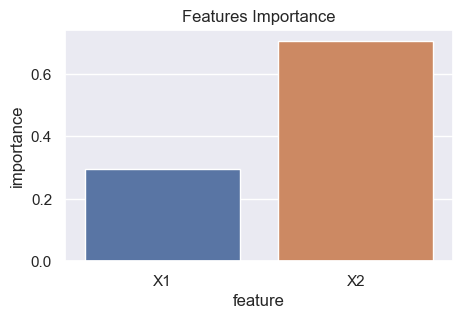

In [20]:
sns.set(rc={"figure.figsize":(5, 3)}) 
sns.barplot(data=ft_importance, x='feature', y='importance').set_title('Features Importance');

### Comparing both models

In [21]:
data_test1.head()

,X1,X2,Class,Class_tree,Class_rf
26,-0.100188,-3.921491,1,1,1
80,2.240493,-16.512285,0,0,0
82,8.644564,-5.713072,1,1,1
68,2.182810,-2.237404,1,1,1
77,-3.767508,-9.218345,0,0,0


In [22]:
# Generating new data
new_data = pd.DataFrame()
new_data['X1'] = np.random.uniform(data_train1.X1.min(), data_train1.X1.max(), size=1000)
new_data['X2'] = np.random.uniform(data_train1.X2.min(), data_train1.X2.max(), size=1000)
new_Class_predA  = dt1.predict(new_data)
new_Class_predB  = rf1.predict(new_data)
new_data['Class_tree'] = new_Class_predA
new_data['Class_rf'] = new_Class_predB

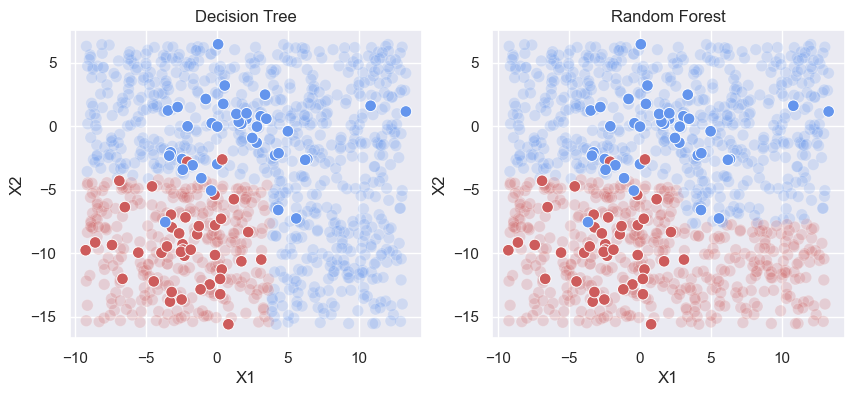

In [23]:
# Plotting boundaries
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.scatterplot(x=new_data.X1,  y=new_data.X2, s=70, hue=new_data.Class_tree, alpha=0.2, 
                palette=['indianred', 'cornflowerblue'], legend=False).set_title("Decision Tree")
sns.scatterplot(x=X_train1.X1, y=X_train1.X2, s=70, hue=y_train1, 
                palette=['indianred', 'cornflowerblue'], legend=False);

plt.subplot(122)
sns.scatterplot(x=new_data.X1,  y=new_data.X2, s=70, hue=new_data.Class_rf, alpha=0.2, 
                palette=['indianred', 'cornflowerblue'], legend=False).set_title("Random Forest")
sns.scatterplot(x=X_train1.X1, y=X_train1.X2, s=70, hue=y_train1, 
                palette=['indianred', 'cornflowerblue'], legend=False);

In [24]:
# Confusion Matrix for the tree model
confusion_matrix(y_true=data_test1.Class,            # True labels
                 y_pred=data_test1.Class_tree)      # Predicted labels

array([[9, 0],
       [2, 9]], dtype=int64)

In [25]:
# Confusion Matrix for random forest model 
confusion_matrix(y_true=data_test1.Class,            # True labels
                 y_pred=data_test1.Class_rf)      # Predicted labels

array([[ 9,  0],
       [ 1, 10]], dtype=int64)

In [26]:
# The accuracy
print('Training Set (Tree Model) Accuracy = %.2f %%' %(dt1.score(X=X_train1, y=y_train1)*100))
print('Testing Set  (Tree Model) Accuracy = %.2f %%' %(dt1.score(X=X_test1,  y=y_test1)*100))
print('-----')
print('Training Set (RF Model) Accuracy = %.2f %%' %(rf1.score(X=X_train1, y=y_train1)*100))
print('Testing Set  (RF Model) Accuracy = %.2f %%' %(rf1.score(X=X_test1,  y=y_test1)*100))

Training Set (Tree Model) Accuracy = 95.00 %
Testing Set  (Tree Model) Accuracy = 90.00 %
-----
Training Set (RF Model) Accuracy = 95.00 %
Testing Set  (RF Model) Accuracy = 95.00 %


## Random Forest: The Raisin Dataset

The dataset contains information about two varieties of raisins (Kecimen and Besni) grown in Turkey.

In [27]:
dfr = pd.read_csv('Raisin.csv')
print(dfr.shape)
dfr.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


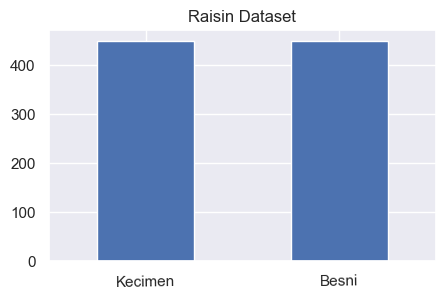

In [28]:
dfr.Class.value_counts().plot(kind='bar', rot=True, title='Raisin Dataset');

In [29]:
# Recoding the class variable
label_to_number = {'Kecimen': 0, 'Besni': 1}
dfr['Besni'] = dfr['Class'].map(label_to_number)
dfr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Besni
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen,0


In [30]:
yr = dfr.Besni                              # Target variable
Xr = dfr.drop(['Class','Besni'], axis=1)    # Feature Matrix
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


Decision trees do not require standardization of variables as they are not affected by linear transformations of the input features.

In [31]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(Xr_train), len(Xr_test)))

Train = 720 cases 	 Test = 180 cases


In [32]:
# Saving training and testing data
data_train_r = pd.concat([Xr_train, yr_train], axis=1)
data_test_r =  pd.concat([Xr_test, yr_test], axis=1)
data_train_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni
516,202118,684.602958,379.719282,0.832080,209242,0.717219,1827.900,1
502,71639,400.413959,231.620142,0.815717,76252,0.642462,1101.879,1
535,77012,425.219427,239.469561,0.826343,81325,0.654280,1131.530,1
151,57980,336.312888,222.609766,0.749581,59311,0.777295,925.795,0
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0


### Raisin Random Forest Model A

We will create a decision tree model with at least `min_samples_leaf` observations in each leaf node.

In [33]:
min_samples_leaf = 50
rfA = RandomForestClassifier(random_state=0, min_samples_leaf = min_samples_leaf) 
rfA.fit(Xr_train, yr_train)

RandomForestClassifier(min_samples_leaf=50, random_state=0)

In [34]:
len(rfA.estimators_)

100

In [35]:
print('Raisin Training Set Score = %.3f' %rfA.score(Xr_train, yr_train))
print('Raisin Testing Set Score  = %.3f' %rfA.score(Xr_test, yr_test))

Raisin Training Set Score = 0.871
Raisin Testing Set Score  = 0.839


In [36]:
# Prediction 
data_train_r['Bensi_rfA'] = rfA.predict(Xr_train)
data_test_r['Bensi_rfA']  = rfA.predict(Xr_test)
data_test_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni,Bensi_rfA
774,76624,473.965993,207.736989,0.898831,80356,0.661008,1205.819,1,1
737,48007,302.611047,209.116084,0.722817,50679,0.677051,889.743,1,0
753,79057,436.390047,236.895393,0.839828,82642,0.654597,1148.146,1,1
890,85646,469.774755,238.539384,0.861490,92673,0.681044,1226.892,1,1
428,48093,329.935742,187.041722,0.823784,49367,0.745108,858.386,0,0


### Raisin Random Forest Model B

We will create a decision tree model that considers split nodes with more than `min_samples_split` observations.

In [37]:
min_samples_split = 100
rfB = RandomForestClassifier(random_state=0, min_samples_split = min_samples_split) 
rfB.fit(Xr_train, yr_train)

RandomForestClassifier(min_samples_split=100, random_state=0)

In [38]:
print('Raisin Training Set Score = %.3f' %rfB.score(Xr_train, yr_train))
print('Raisin Testing Set  Score = %.3f' %rfB.score(Xr_test, yr_test))

Raisin Training Set Score = 0.875
Raisin Testing Set  Score = 0.850


In [39]:
# Prediction 
data_train_r['Bensi_rfB'] = rfB.predict(Xr_train)
data_test_r['Bensi_rfB']  = rfB.predict(Xr_test)
data_test_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni,Bensi_rfA,Bensi_rfB
774,76624,473.965993,207.736989,0.898831,80356,0.661008,1205.819,1,1,1
737,48007,302.611047,209.116084,0.722817,50679,0.677051,889.743,1,0,0
753,79057,436.390047,236.895393,0.839828,82642,0.654597,1148.146,1,1,1
890,85646,469.774755,238.539384,0.861490,92673,0.681044,1226.892,1,1,1
428,48093,329.935742,187.041722,0.823784,49367,0.745108,858.386,0,0,0


### Raisin Random Forest Model C

We will create a decision tree model with maximum depth of `max_depth`.

In [40]:
max_depth = 4
rfC = tree.DecisionTreeClassifier(random_state=0, max_depth = max_depth) 
rfC.fit(Xr_train, yr_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [41]:
print('Raisin Training Set Score = %.3f' %rfC.score(Xr_train, yr_train))
print('Raisin Testing Set  Score = %.3f' %rfC.score(Xr_test, yr_test))

Raisin Training Set Score = 0.889
Raisin Testing Set  Score = 0.856


In [42]:
# Prediction 
data_train_r['Bensi_rfC'] = rfC.predict(Xr_train)
data_test_r['Bensi_rfC']  = rfC.predict(Xr_test)
data_test_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni,Bensi_rfA,Bensi_rfB,Bensi_rfC
774,76624,473.965993,207.736989,0.898831,80356,0.661008,1205.819,1,1,1,1
737,48007,302.611047,209.116084,0.722817,50679,0.677051,889.743,1,0,0,0
753,79057,436.390047,236.895393,0.839828,82642,0.654597,1148.146,1,1,1,1
890,85646,469.774755,238.539384,0.861490,92673,0.681044,1226.892,1,1,1,1
428,48093,329.935742,187.041722,0.823784,49367,0.745108,858.386,0,0,0,0


### Looking for a better model 

In [43]:
# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [10, 50, 100],
    'min_samples_leaf': [10, 50, 80],
    'min_samples_split': [10, 50, 100],
    'max_depth': [None, 2, 6, 8]
}

In [44]:
rf = RandomForestClassifier(random_state=0, n_estimators=10)

In [45]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(Xr_train, yr_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=0),
             param_grid={'max_depth': [None, 2, 6, 8],
                         'min_samples_leaf': [10, 50, 80],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [10, 50, 100]})

In [46]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 50}


In [47]:
best_model = grid_search.best_estimator_
best_model.fit(Xr_train, yr_train)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=50,
                       n_estimators=50, random_state=0)

In [48]:
# Print the accuracy score of the best model on training and testing sets
print("Accuracy on training cases = %.4f" %best_model.score(Xr_train, yr_train))
print("Accuracy on testing cases  = %.4f" %best_model.score(Xr_test, yr_test))

Accuracy on training cases = 0.8764
Accuracy on testing cases  = 0.8611


## Conclusions

Key Takeaways
- The Random Forest model generally outperformed the simple Decision Tree model, demonstrating higher accuracy and robustness by leveraging the averaging of multiple decision trees.
- The Out-of-Bag (OOB) score indicated high model reliability without needing a separate validation set.
- Feature importance metrics provided insights into which features were most influential in predicting the target variable, helping to understand the model's underlying decision-making process.
- Adjusting parameters like the number of trees (`n_estimators`), tree depth (`max_depth`), and minimum samples per leaf (`min_samples_leaf`) influence the model performance and complexity, emphasizing the need for careful tuning to balance between overfitting and underfitting.

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
- https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5